## Machine Learning - Ex.6


Submitted by: **[enter your name/s]**

In [190]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC 


### 1. Linear SVM

In this exercise we will use 'sklearn' library's implementation of the SVM classifier:

<http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>

Use their SVC module to train a **linear** SVM classifier on the following dataset.

Set the SVC parameters with kernel='linear' and C=10.

Use the `predict` method to count how many examples were misclassified.

Use the `decision_function` method to visualize decision function $Z(x_1,x_2)$. As always, use the `plt.contour` function, and also add a matching `colorbar`.

Mark the decision boundary ($Z=0$) and the margin lines ($Z=-1$ and $Z=1$). Hint: these are just a contour lines at levels=[-1,0,1].

Use the `support_` attribute to mark the *support-vectors* points.

Repeat the same analysis, this time with C=1000. 

- which one is better? why? [**write your answer here..**]



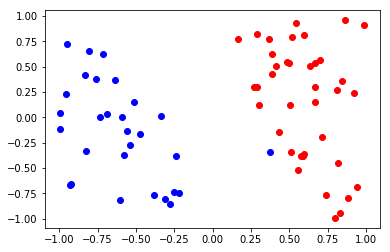

In [191]:
x1,x2,y=np.loadtxt('ex6_data1.csv',delimiter=',',unpack=True)

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')
plt.show()

### For C=10

In [192]:
# your code here...

X=np.c_[x1,x2]

SVM = SVC(kernel='linear',C=10)
SVM.fit(X,y);

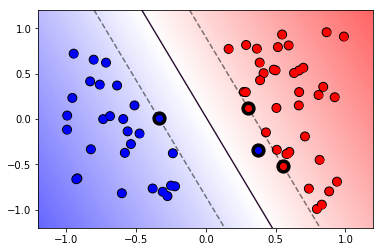

In [193]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))


Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.bwr)


contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)

plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=plt.cm.bwr,
            edgecolors='black')

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')


plt.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=150, linewidth=2,facecolors='black');

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
         linestyles=['--', '-', '--'])


plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.show()

In [194]:
len(SVM.support_vectors_)

4

### For C=1000

In [195]:
# your code here...

X=np.c_[x1,x2]

SVM = SVC(kernel='linear',C=1000)
SVM.fit(X,y);

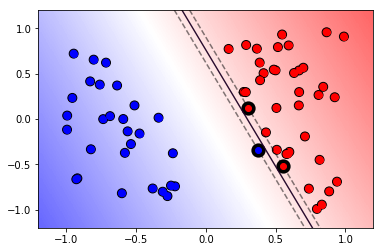

In [196]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))


Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.bwr)


contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)

plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=plt.cm.bwr,
            edgecolors='black')

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')


plt.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=150, linewidth=2,facecolors='black');

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
         linestyles=['--', '-', '--'])


plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.show()

In [197]:
len(SVM.support_vectors_)

3

### 2.  SVM with polynomial kerner

Load the data points the file `ex6_data2.csv`. 

Clearly, these points are not linearly seperable in their 2-D *input space*. We will use the SVM classifier with 2nd degree polynomial kernel:

$$ K(\vec{x_{}},\vec{y_{}})=(\vec{x_{}} \cdot \vec{y_{}} + 1)^2   $$

to classify them in the *feature-space*.

Set the SVC parameters with `kernel='poly'` and degree=2, and try different values of the C parameter until you are satisfied with the results.

Visualize the results in the same way as before.

- how many support vectors the solution has?



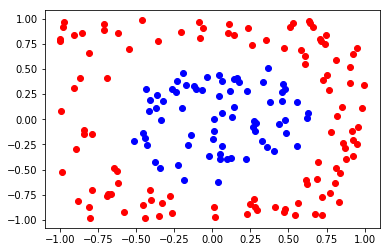

In [198]:
x1,x2,y=np.loadtxt('ex6_data2.csv',delimiter=',',unpack=True)

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')
plt.show()

In [199]:
# your code here...

X=np.c_[x1,x2]

SVM = SVC(kernel='poly',degree=2,C=300)
SVM.fit(X,y);

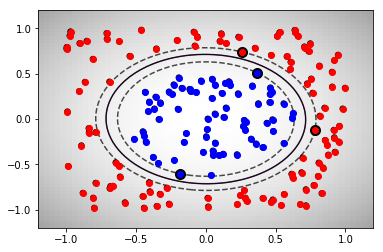

In [200]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))


Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.binary)


contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.bwr,
            edgecolors='black')

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')


plt.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=100, linewidth=1,facecolors='black');

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
         linestyles=['--', '-', '--'])

plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.show()

In [201]:
len(SVM.support_vectors_)

4

### 3.  SVM with RBF kerner

Load the data points the file `ex6_data3.csv`. 

We will use the RBF kernel to classify this dataset:

$$ K(\vec{x_{}},\vec{y_{}})=e^{-\gamma \|\vec{x_{}}-\vec{y_{}} \|^2 } $$

Set the SVC parameters with `kernel='rbf'`, and try different values of the C and gamma parameters until you are satisfied with the results.

Visualize the results in the same way as before.

- how many support vectors the solution has?



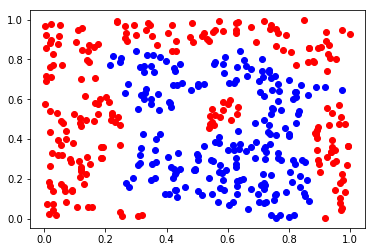

In [202]:
x1,x2,y=np.loadtxt('ex6_data3.csv',delimiter=',',unpack=True)

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')
plt.show()

In [203]:
# your code here...

X=np.c_[x1,x2]

SVM = SVC(kernel='rbf',gamma=4,C=1000)
SVM.fit(X,y);

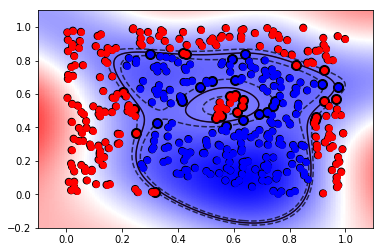

In [204]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))


Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.bwr)


contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.bwr,
            edgecolors='black')

plt.plot(x1[y==-1],x2[y==-1],'ob')
plt.plot(x1[y==1],x2[y==1],'or')


plt.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=100, linewidth=1,facecolors='black');

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
         linestyles=['--', '-', '--'])



plt.axis([-0.1, 1.1, -0.2, 1.1])

plt.show()

In [205]:
len(SVM.support_vectors_)

36

## Good luck !